# Simulation of the IEEE 9-bus system with conventional simulators

In this notebook, we show how the power system dynamics are simulated with an exact (highly accurate) adaptive time-stepping scheme (Assimulo) and the Trapezoidal rule with fixed time step size.

### Setting up the test case 

We begin by importing a power system that provides an equilibrium case, stemming from power flow data. The variables `equilibrium_state_list` and `equilibrium_control_input_list` contain the corresponding values for the states and control inputs for all connected components (dynamic and static). Note, that static components do have an empty state vector.

In [24]:
from pinnsim.configurations.load_dynamic_case import load_equilibrium_case
from pinnsim.numerics import SimulatorAssimulo, SimulatorTrapezoidal

In [25]:
grid_model, equilibrium_state_list, equilibrium_control_input_list, theta, V = (
    load_equilibrium_case(case="ieee9")
)

### Instantiate the simulator instance

Here, we use the Assimulo package to simulate the system of DAEs. We can adjust the tolerance setting and other solver specific values. All information and functions concerning the dynamical system, i.e., the power grid, are supplied in the `grid_model`.

In [26]:
simulator = SimulatorAssimulo(grid_model=grid_model)

### Experiment setup

To cause a transient response, we simply change the mechanical power input (a control input for the classical machine model) of machine 1 and set the simulation end time to 2.5 seconds.

In [27]:
equilibrium_control_input_list[0][:, 0] *= 0.5
time_end = 2.5

### Simulation

We now run the simulation with this exact (here meaning highly accurate) solver and save the results.

In [28]:
results_exact = simulator.simulate_trajectory(
    time_end=time_end,
    component_state_list_initial=equilibrium_state_list,
    control_input_list=equilibrium_control_input_list,
    theta_initial=theta,
    V_initial=V,
)

### Result visualisation

We now plot the resulting trajectories.

C:\Users\jstiasny\.python\pinnsim_pscc\src\pinnsim\post_processing\grid_trajectory_plot.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


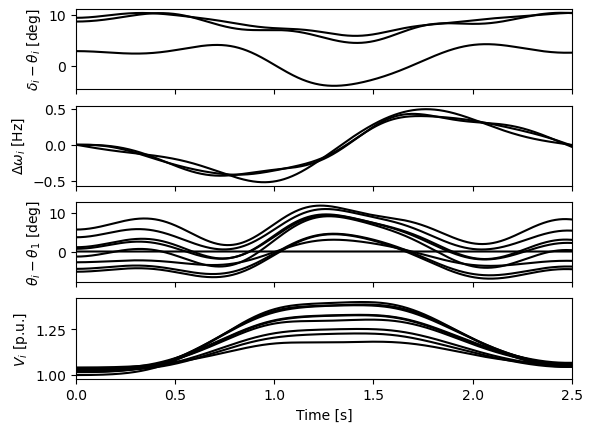

In [29]:
from pinnsim.post_processing.grid_trajectory_plot import GridTrajectoryPlot

plot_object = GridTrajectoryPlot(grid_model=grid_model)
plot_object.add_results(results_data=results_exact)
plot_object.show_plot(time_end=time_end)


### Simulation with the trapezoidal rule

We repeat the simulation with the trapezoidal rule with a time step size of 0.1, for which the results show already a clear deviation from the exact simulator.

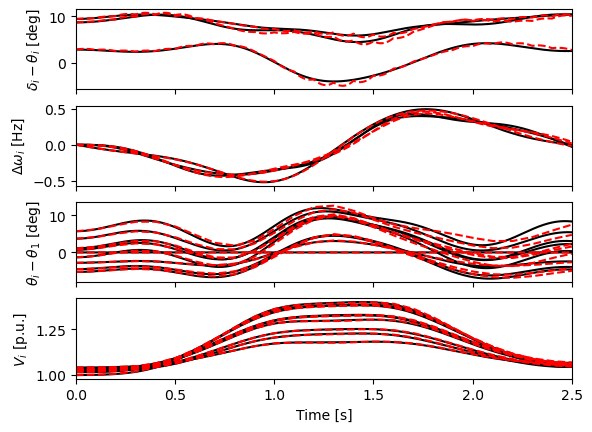

In [30]:
simulator_trapezoidal = SimulatorTrapezoidal(grid_model=grid_model, timestep_size=0.1)

results_trapezoidal = simulator_trapezoidal.simulate_trajectory(
        time_end=time_end,
        component_state_list_initial=equilibrium_state_list,
        control_input_list=equilibrium_control_input_list,
        theta_initial=theta,
        V_initial=V,
    )

plot_object = GridTrajectoryPlot(grid_model=grid_model)
plot_object.add_results(results_data=results_exact)
plot_object.add_results(results_data=results_trapezoidal, line_style="--r")
plot_object.show_plot(time_end=time_end)

With a time step size of 0.025, the results closely match.

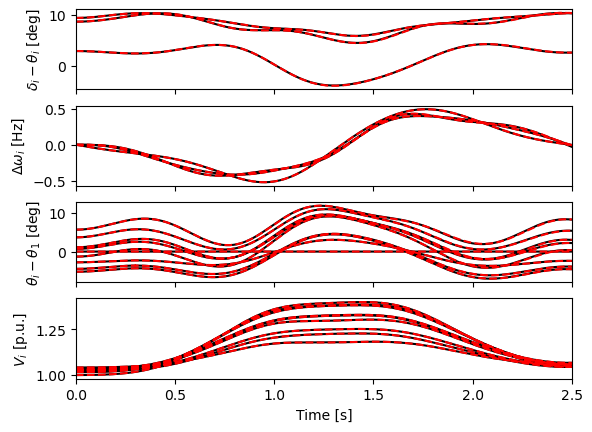

In [31]:
simulator_trapezoidal = SimulatorTrapezoidal(grid_model=grid_model, timestep_size=0.025)

results_trapezoidal = simulator_trapezoidal.simulate_trajectory(
        time_end=time_end,
        component_state_list_initial=equilibrium_state_list,
        control_input_list=equilibrium_control_input_list,
        theta_initial=theta,
        V_initial=V,
    )

plot_object = GridTrajectoryPlot(grid_model=grid_model)
plot_object.add_results(results_data=results_exact)
plot_object.add_results(results_data=results_trapezoidal, line_style="--r")
plot_object.show_plot(time_end=time_end)